<a href="https://colab.research.google.com/github/atul-gupta2002/Codes/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
data = load_iris()
x=data.data
y=data.target

In [13]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [14]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print(data.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
y_dummies = pd.get_dummies(y).values
print(y_dummies[ :3])

[[ True False False]
 [ True False False]
 [ True False False]]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)

In [19]:
learning_rate=0.1
iterations = 5000
N =y_train.size
input_size = 4
hidden_size=2
output_size = 3
results = pd.DataFrame(columns=["mse","accuracy"])

In [20]:
np.random.seed(10)
w1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
w2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def mean_squared_error(y_true, y_pred):
  if y_true.ndim == 1:
    y_true =y_true[:,np.newaxis]
    return ((y_pred-y_true)**2).sum()/(2*y_pred.size)


def accuracy(y_pred,y_true):
    if y_true.ndim == 1:
      y_true = y_true[:,np.newaxis]
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [22]:
result=[]

In [25]:
for itr in range(iterations):
  z1 = np.dot(x_train, w1)
  a1 = sigmoid(z1)
  z2 = np.dot(a1, w2)
  a2 = sigmoid(z2)

  mse = mean_squared_error(a2,y_train)
  acc = accuracy(a2, y_train)
  result.append({"mse":mse,"accuracy":acc})

  y_train_reshaped = y_train.reshape(-1,1)
  e1 = a2-y_train_reshaped
  dw1 = e1*a2*(1-a2)
  e2=np.dot(dw1,w2.T)
  dw2 = e2*a1*(1-a1)

  w2_update = np.dot(a1.T, dw1)/N
  w1_update = np.dot(x_train.T, dw2)/N

  w2 = w2 - learning_rate*w2_update
  w1 = w1 - learning_rate*w1_update

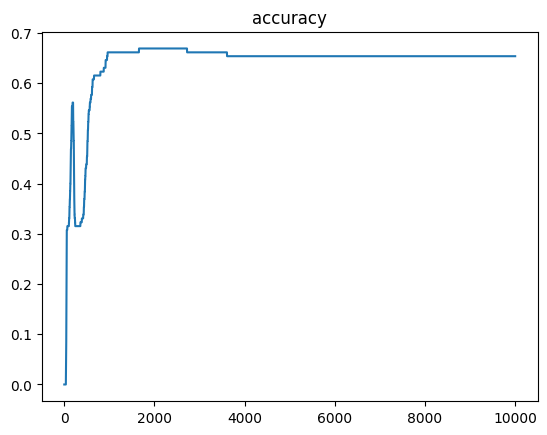

In [29]:
results_df = pd.DataFrame(result)  # Create a DataFrame from the 'result' list
results_df.accuracy.plot(title="accuracy")
plt.show()

In [30]:
def accuracy(y_pred,y_true):
    if y_true.ndim == 1:
      y_true = y_true[:,np.newaxis]
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [31]:
acc = accuracy(a2, y_train)

In [32]:
# Print all accuracy values
print(results_df['accuracy'])

# Get the final accuracy (after all iterations)
final_accuracy = results_df['accuracy'].iloc[-1]
print("Final Accuracy:", final_accuracy)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
9995    0.653846
9996    0.653846
9997    0.653846
9998    0.653846
9999    0.653846
Name: accuracy, Length: 10000, dtype: float64
Final Accuracy: 0.6538461538461539
